In [4]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [6]:
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
from keras.utils import to_categorical

In [9]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten

In [11]:
model = Sequential()

# First Set of Conv Layers
model.add(Conv2D(input_shape=(32, 32, 3), filters=32, kernel_size=(4, 4), activation='relu'))
model.add(Conv2D(input_shape=(32, 32, 3), filters=32, kernel_size=(4, 4), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Second Set of Conv Layers
model.add(Conv2D(input_shape=(32, 32, 3), filters=32, kernel_size=(4, 4), activation='relu'))
model.add(Conv2D(input_shape=(32, 32, 3), filters=32, kernel_size=(4, 4), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Flatten
model.add(Flatten())

# Dense
model.add(Dense(256, activation='relu'))

# Output
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        16416     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 32)        16416     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 32)          16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                    

In [13]:
model.fit(X_train, y_cat_train, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 88s 56ms/step - loss: 1.6101 - accuracy: 0.4152
Epoch 2/10
1563/1563 [==============================] - 88s 56ms/step - loss: 1.2216 - accuracy: 0.5667
Epoch 3/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.0645 - accuracy: 0.6251
Epoch 4/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.9692 - accuracy: 0.6614
Epoch 5/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.9012 - accuracy: 0.6858
Epoch 6/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.8660 - accuracy: 0.7010
Epoch 7/10
1563/1563 [==============================] - 82s 52ms/step - loss: 0.8401 - accuracy: 0.7125
Epoch 8/10
1563/1563 [==============================] - 90s 58ms/step - loss: 0.8399 - accuracy: 0.7121
Epoch 9/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.8352 - accuracy: 0.7162
Epoch 10/10
1563/1563 [==============================] - 82s 52m

In [15]:
import numpy as np

In [16]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)

313/313 [==============================] - 3s 9ms/step


In [19]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69      1051
           1       0.68      0.93      0.79       737
           2       0.47      0.67      0.55       705
           3       0.62      0.43      0.51      1447
           4       0.44      0.65      0.52       673
           5       0.43      0.67      0.53       643
           6       0.49      0.92      0.64       539
           7       0.89      0.45      0.60      1981
           8       0.79      0.76      0.77      1047
           9       0.84      0.71      0.77      1177

    accuracy                           0.64     10000
   macro avg       0.64      0.69      0.64     10000
weighted avg       0.69      0.64      0.64     10000



In [21]:
import random

1/1 [==============================] - 0s 53ms/step
9


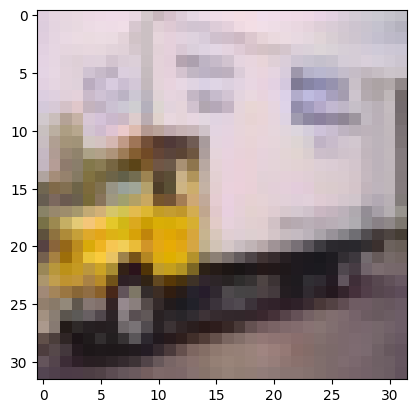

In [28]:
image = random.choice(X_test)
plt.imshow(image)
pred = model.predict(image.reshape(1, 32, 32, 3))
print(pred.argmax())